In [ ]:
# https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers import BatchNormalization

import numpy as np
import pandas as pd

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU') # True/False

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Download Dataset

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O cats_and_dogs_filtered.zip

--2022-04-08 18:13:55--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  43.4MB/s    in 1.5s    

2022-04-08 18:13:59 (43.4 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = 'cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')
zip_ref.close()

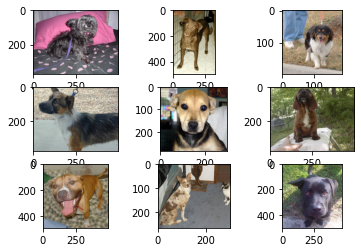

In [ ]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# plot first few images
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # define filename
  filename = "cats_and_dogs_filtered/train/dogs/dog.{}.jpg".format(i)
  # load image pixels
  image = imread(filename)
  # plot raw pixel data
  pyplot.imshow(image)
# show the figure
pyplot.show()

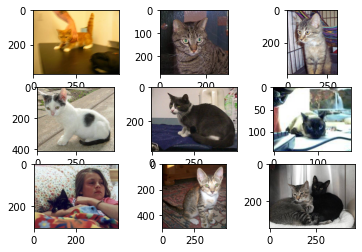

In [ ]:
# plot first few images
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # define filename
  filename = "cats_and_dogs_filtered/train/cats/cat.{}.jpg".format(i)
  # load image pixels
  image = imread(filename)
  # plot raw pixel data
  pyplot.imshow(image)
# show the figure
pyplot.show()

In [ ]:
'''
cats_and_dogs_filtered
  ├───validation
  │   ├───cats
  │   │   ├───cat.0.jpg
  │   │   └───cat.1.jpg
  │   └───dogs
  │       ├───dog.0.jpg
  │       └───dog.1.jpg
  └───train
      ├───cats
      │   ├───cat.0.jpg
      │   └───cat.1.jpg
      └───dogs
          ├───dog.0.jpg
          └───dog.1.jpg

'''
from keras.preprocessing.image import ImageDataGenerator
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
trdata = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_data = trdata.flow_from_directory(
    directory="cats_and_dogs_filtered/train",
    target_size=(224,224),
    class_mode='binary')

tsdata = ImageDataGenerator(rescale=1./255,)
test_data = tsdata.flow_from_directory(
    directory="cats_and_dogs_filtered/validation", 
    target_size=(224,224),
    class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


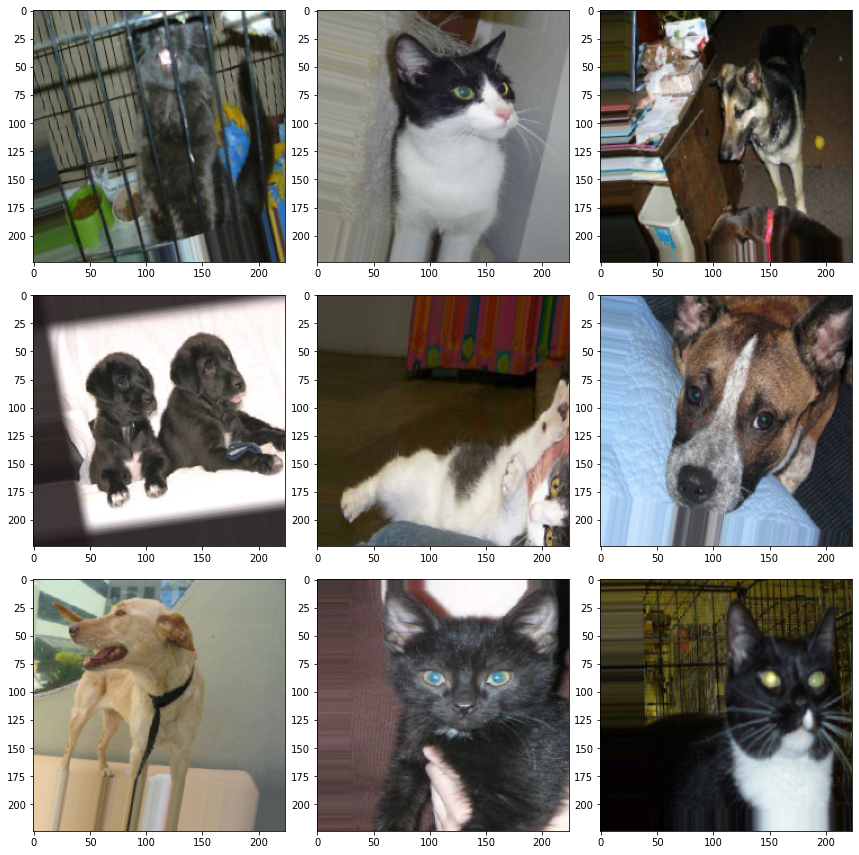

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in train_data:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# VGG16 Model

In [ ]:
def VGG16(weights_path=None):
    model = Sequential()
    model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(units=4096,activation="relu"))
    model.add(Dense(units=4096,activation="relu"))
    model.add(Dense(units=1, activation="sigmoid"))
    
    if weights_path:
        model.load_weights(weights_path)

    return model

In [ ]:
model = VGG16()

In [ ]:
from tensorflow.keras.optimizers import Adam 
opt = Adam(learning_rate=0.01)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

# Training

In [ ]:
#Defining the parameters
batch_size=128
epochs=10

In [ ]:
history = model.fit(train_data, validation_data=test_data, epochs = epochs)

Epoch 1/10
63/63 [==============================] - 60s 671ms/step - loss: 3133429.0000 - accuracy: 0.5085 - val_loss: 0.7901 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 38s 597ms/step - loss: 0.7116 - accuracy: 0.5000 - val_loss: 0.7564 - val_accuracy: 0.5000
Epoch 3/10
63/63 [==============================] - 38s 599ms/step - loss: 0.7366 - accuracy: 0.5010 - val_loss: 0.7036 - val_accuracy: 0.5000
Epoch 4/10
63/63 [==============================] - 38s 603ms/step - loss: 0.7362 - accuracy: 0.5010 - val_loss: 0.7048 - val_accuracy: 0.5000
Epoch 5/10
63/63 [==============================] - 38s 601ms/step - loss: 0.7457 - accuracy: 0.4880 - val_loss: 0.9224 - val_accuracy: 0.5000
Epoch 6/10
63/63 [==============================] - 38s 604ms/step - loss: 0.7211 - accuracy: 0.5100 - val_loss: 0.7115 - val_accuracy: 0.5000
Epoch 7/10
63/63 [==============================] - 38s 598ms/step - loss: 0.7005 - accuracy: 0.4930 - val_loss: 0.7162 - val_accuracy: 

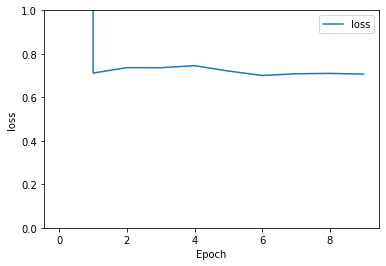

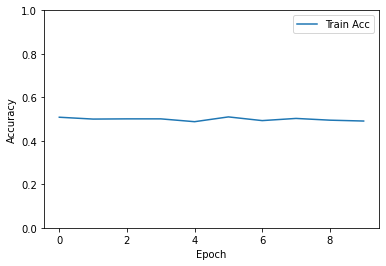

In [ ]:
from matplotlib import pyplot as plt
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'],
           label='loss')
    #plt.plot(hist['epoch'], hist['val_loss'],
    #       label = 'Val loss')
    plt.ylim([0,1])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Acc')
    #plt.plot(hist['epoch'], hist['val_accuracy'],
    #       label = 'Val Acc')
    plt.ylim([0,1])
    plt.legend()
    plt.show()


plot_history(history)


In [ ]:
scores = model.evaluate(test_data)
print("Accuracy: {}".format(scores[1]))
